In [153]:
import qiskit
import matplotlib

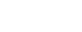

In [154]:
qc = qiskit.QuantumCircuit()
qc.draw()

In [155]:
qr = qiskit.QuantumRegister(2)

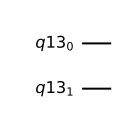

In [156]:
qc.add_register(qr)
qc.draw()

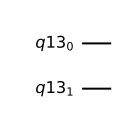

In [157]:

qc.draw()

In [158]:
# Simulate the circuit to get the statevector
sim = qiskit.Aer.get_backend('statevector_simulator')
job = sim.run(qc)
result = job.result().get_statevector()


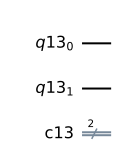

In [159]:
creg =  qiskit.ClassicalRegister(2)
qc.add_register(creg)
qc.draw()

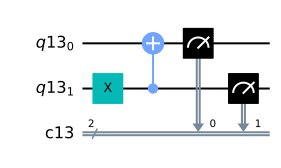

In [160]:
qc.x(1)
#qc.h(0)
qc.cx(1, 0)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw()

In [161]:
qasm_sim = qiskit.Aer.get_backend('qasm_simulator')
job = qasm_sim.run(qc, shots=8192)

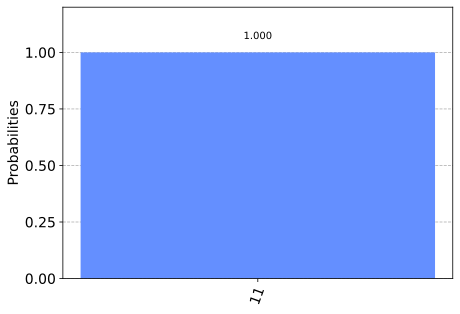

In [162]:
hist = job.result().get_counts(qc)
qiskit.visualization.plot_histogram(hist)

In [163]:
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q')
for backend in provider.backends():
    print(backend)

ibmqfactory.load_account:WARNING:2022-02-28 19:38:31,061: Credentials are already in use. The existing account in the session will be replaced.


ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila


In [164]:
real_device = provider.get_backend('ibmq_manila')
job = real_device.run(qc)
result = job.result()
print(result)

Result(backend_name='ibmq_manila', backend_version='1.0.26', qobj_id='a20ae6d8-03b6-486a-8f28-80b613357153', job_id='621d16ab5dfd77a8145b470a', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 25, '0x1': 103, '0x2': 173, '0x3': 3699}), header=QobjExperimentHeader(qubit_labels=[['q13', 0], ['q13', 1]], n_qubits=2, qreg_sizes=[['q13', 2]], clbit_labels=[['c13', 0], ['c13', 1]], memory_slots=2, creg_sizes=[['c13', 2]], name='circuit-17', global_phase=0.0, metadata={}))], date=2022-02-28 19:41:59+01:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_manila', backend_version='1.0.26'), execution_id='18c13620-98c6-11ec-934e-bc97e15b08d0', time_taken=6.266291379928589, error=None, client_version={'qiskit': '0.34.2'})


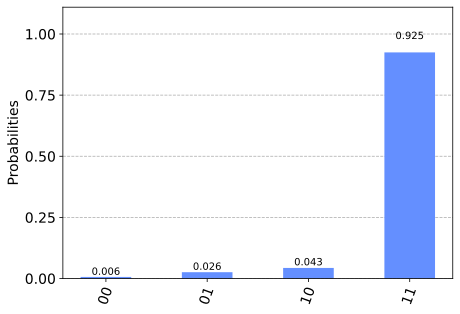

In [165]:
qiskit.visualization.plot_histogram(result.get_counts(qc))